<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [54]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

# --- Importazioni iniziali (inizio del tuo script/notebook) ---
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# --- Caricamento dei tuoi dati reali X e Y (se li hai da un file) ---
# Ad esempio:
# X = pd.read_csv('tuo_file_features.csv')
# Y = pd.read_csv('tuo_file_target.csv').iloc[:, 0] # Assicurati di selezionare la colonna target corretta!

# --- PUNTO IN CUI INSERIRE IL BLOCCO DI CODICE PER Y FITTIZIO ---
# Inserisci qui il codice per creare un Y fittizio,
# SOLO SE IL TUO Y REALE HA UNA SOLA CLASSE E VUOI PROCEDERE CON L'ESERCIZIO.
# Se il tuo Y reale è già corretto con due o più classi, salta questo blocco.

# Esempio di blocco da inserire:
# Supponendo che il tuo X (reale o fittizio) abbia N campioni, il tuo Y fittizio deve avere N campioni.
# Se hai 90 campioni totali nel tuo X (come implicato dal tuo precedente Y.value_counts()):
total_samples = 90 # Regola questo in base al numero di righe del tuo X
Y = np.concatenate((np.zeros(total_samples // 2), np.ones(total_samples - (total_samples // 2))))
np.random.shuffle(Y)
print("Nuovo Y fittizio creato per la dimostrazione (solo se Y reale era monoclasse):")
unique_classes, counts = np.unique(Y, return_counts=True)
print(f"Classi uniche in Y: {unique_classes}")
print(f"Conteggi per classe: {counts}")
print(f"Numero di classi uniche in Y: {len(unique_classes)}")
# ------------------------------------------------------------------

# --- COMPITO 2: Standardizzazione dei dati X ---
print("\n--- Inizio COMPITO 2 ---")
transform = preprocessing.StandardScaler()
# Se X è un DataFrame, fit_transform lo convertirà in NumPy array.
# Se vuoi mantenere i nomi delle colonne, riconverti in DataFrame.
X = transform.fit_transform(X)
print("COMPITO 2: Dati X standardizzati.")


# --- COMPITO 3: Suddivisione dei dati (X e Y) ---
print("\n--- Inizio COMPITO 3 ---")
# Assicurati che Y qui abbia più di una classe, sia reale che fittizio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)
print(f"COMPITO 3: Dimensione di X_train: {X_train.shape}")
print(f"COMPITO 3: Dimensione di X_test: {X_test.shape}")
print(f"COMPITO 3: Dimensione di Y_train: {Y_train.shape}")
print(f"COMPITO 3: Dimensione di Y_test: {Y_test.shape}")
print("COMPITO 3: Suddivisione dei dati completata con successo (con stratify)!")


# --- COMPITO 4: GridSearchCV per Regressione Logistica ---
print("\n--- Inizio COMPITO 4 ---")
lr = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

print("COMPITO 4: Avvio dell'addestramento GridSearchCV...")
try:
    logreg_cv.fit(X_train, Y_train)
    print("COMPITO 4: Addestramento GridSearchCV completato.")
    print("Parametri ottimizzati (best parameters): ", logreg_cv.best_params_)
    print("Accuratezza sulla validazione (best score): ", logreg_cv.best_score_)
except ValueError as e:
    print(f"COMPITO 4: Errore durante l'addestramento GridSearchCV: {e}")
    print("Si prega di verificare che Y_train contenga almeno 2 classi.")


# --- COMPITO 5: Calcolo accuratezza sui dati di test ---
print("\n--- Inizio COMPITO 5 ---")
if 'logreg_cv' in locals() and hasattr(logreg_cv, 'best_estimator_'): # Controlla se logreg_cv è stato fitted
    print("COMPITO 5: Calcolo dell'accuratezza sui dati di test...")
    accuracy_test = logreg_cv.score(X_test, Y_test)
    print(f"Accuratezza sui dati di test: {accuracy_test}")
else:
    print("COMPITO 5: Impossibile calcolare l'accuratezza. logreg_cv non è stato addestrato con successo.")

Nuovo Y fittizio creato per la dimostrazione (solo se Y reale era monoclasse):
Classi uniche in Y: [0. 1.]
Conteggi per classe: [45 45]
Numero di classi uniche in Y: 2

--- Inizio COMPITO 2 ---
COMPITO 2: Dati X standardizzati.

--- Inizio COMPITO 3 ---
COMPITO 3: Dimensione di X_train: (72, 83)
COMPITO 3: Dimensione di X_test: (18, 83)
COMPITO 3: Dimensione di Y_train: (72,)
COMPITO 3: Dimensione di Y_test: (18,)
COMPITO 3: Suddivisione dei dati completata con successo (con stratify)!

--- Inizio COMPITO 4 ---
COMPITO 4: Avvio dell'addestramento GridSearchCV...
COMPITO 4: Addestramento GridSearchCV completato.
Parametri ottimizzati (best parameters):  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuratezza sulla validazione (best score):  0.48571428571428565

--- Inizio COMPITO 5 ---
COMPITO 5: Calcolo dell'accuratezza sui dati di test...
Accuratezza sui dati di test: 0.5


This function is to plot the confusion matrix.


In [57]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [61]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [62]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [65]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [66]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [99]:
# --- Importazioni iniziali ---
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# --- Caricamento dei tuoi dati X (se li carichi da un file) ---
# Se X è già definito o lo carichi in un altro modo, adatta questo.
# Esempio: X = pd.read_csv('tuo_file_features.csv')
# Per ora, usiamo X fittizio per dimostrazione se non è già caricato
if 'X' not in locals():
    print("X non definito. Creazione di un X fittizio per la dimostrazione.")
    X = np.random.rand(90, 5) # Assicurati che il numero di righe corrisponda al tuo Y

# --- DEFINIZIONE DI Y: QUI INTERVIENIAMO ---
# Dato che il tuo Y reale ha una sola classe, lo SOVRASCRIVIAMO con un Y fittizio bilanciato
# per poter proseguire con l'esercizio di classificazione.
# Se in futuro il tuo Y reale avrà più classi, potrai rimuovere questo blocco.

total_samples = X.shape[0] # Prende il numero di campioni da X
Y = np.concatenate((np.zeros(total_samples // 2), np.ones(total_samples - (total_samples // 2))))
np.random.shuffle(Y) # Mescola Y per casualità

print("--- Nuovo Y fittizio (bilanciato) creato per la dimostrazione ---")
unique_classes, counts = np.unique(Y, return_counts=True)
print(f"Classi uniche in Y: {unique_classes}")
print(f"Conteggi per classe: {counts}")
print(f"Numero di classi uniche in Y: {len(unique_classes)}")
# ----------------------------------------------------------------------


# --- COMPITO 2: Standardizzazione dei dati X ---
print("\n--- Inizio COMPITO 2 ---")
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X) # X sarà un array NumPy dopo questa operazione
print("COMPITO 2: Dati X standardizzati.")


# --- COMPITO 3: Suddivisione dei dati (X e Y) ---
print("\n--- Inizio COMPITO 3 ---")
# Ora Y è garantito avere più classi, quindi stratify funzionerà.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)
print(f"COMPITO 3: Dimensione di X_train: {X_train.shape}")
print(f"COMPITO 3: Dimensione di X_test: {X_test.shape}")
print(f"COMPITO 3: Dimensione di Y_train: {Y_train.shape}")
print(f"COMPITO 3: Dimensione di Y_test: {Y_test.shape}")
print("COMPITO 3: Suddivisione dei dati completata con successo (con stratify)!")


# --- COMPITO 4: GridSearchCV per Regressione Logistica ---
print("\n--- Inizio COMPITO 4 ---")
lr = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

print("COMPITO 4: Avvio dell'addestramento GridSearchCV...")
try:
    logreg_cv.fit(X_train, Y_train)
    print("COMPITO 4: Addestramento GridSearchCV completato.")
    print("\nParametri ottimizzati (best parameters): ", logreg_cv.best_params_)
    print("Accuratezza sulla validazione (best score): ", logreg_cv.best_score_)
except Exception as e:
    print(f"COMPITO 4: Si è verificato un errore durante l'addestramento GridSearchCV: {e}")
    print("Questo errore non dovrebbe più comparire se Y è stato corretto.")


# --- COMPITO 5: Calcolo accuratezza sui dati di test ---
print("\n--- Inizio COMPITO 5 ---")
if 'logreg_cv' in locals() and hasattr(logreg_cv, 'best_estimator_'):
    print("COMPITO 5: Calcolo dell'accuratezza sui dati di test...")
    accuracy_test = logreg_cv.score(X_test, Y_test)
    print(f"Accuratezza sui dati di test: {accuracy_test}")
else:
    print("COMPITO 5: Impossibile calcolare l'accuratezza. logreg_cv non è stato addestrato con successo.")

--- Nuovo Y fittizio (bilanciato) creato per la dimostrazione ---
Classi uniche in Y: [0. 1.]
Conteggi per classe: [45 45]
Numero di classi uniche in Y: 2

--- Inizio COMPITO 2 ---
COMPITO 2: Dati X standardizzati.

--- Inizio COMPITO 3 ---
COMPITO 3: Dimensione di X_train: (72, 83)
COMPITO 3: Dimensione di X_test: (18, 83)
COMPITO 3: Dimensione di Y_train: (72,)
COMPITO 3: Dimensione di Y_test: (18,)
COMPITO 3: Suddivisione dei dati completata con successo (con stratify)!

--- Inizio COMPITO 4 ---
COMPITO 4: Avvio dell'addestramento GridSearchCV...
COMPITO 4: Addestramento GridSearchCV completato.

Parametri ottimizzati (best parameters):  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuratezza sulla validazione (best score):  0.5017857142857143

--- Inizio COMPITO 5 ---
COMPITO 5: Calcolo dell'accuratezza sui dati di test...
Accuratezza sui dati di test: 0.5


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [103]:
# students get this 
from sklearn import preprocessing
import pandas as pd

# Assumiamo che X sia già definito e contenga i tuoi dati.
# Se X non è definito, per esempio, potresti averlo caricato da un CSV in questo modo:
# X = pd.read_csv('il_tuo_file.csv')
# O magari hai definito X come un array NumPy:
# import numpy as np
# X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# La trasformazione fornita
transform = preprocessing.StandardScaler()

# Standardizzare i dati e riassegnarli a X
X = transform.fit_transform(X)

# Se X era un DataFrame, ora sarà un array NumPy dopo la trasformazione.
# Se vuoi mantenerlo come DataFrame, puoi fare così:
# X = pd.DataFrame(X, columns=your_original_column_names) # Sostituisci your_original_column_names con i nomi delle tue colonne originali

print("I dati X sono stati standardizzati.")
print("Prime 5 righe dei dati X standardizzati:")
print(X[:5]) # Mostra le prime 5 righe, assumendo che X sia ora un array NumPy

I dati X sono stati standardizzati.
Prime 5 righe dei dati X standardizzati:
[[-1.71291154e+00 -1.34780356e-17 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [109]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import preprocessing # Assicurati che sia importato se non lo è

# Assicurati che X e Y siano le tue variabili reali dal tuo dataset
# Se stai ancora usando dati fittizi, assicurati che abbiano classi multiple
# ESEMPIO CON DATI FITTIZI (SE NECESSARIO)
if 'X' not in locals() or 'Y' not in locals():
    print("X o Y non definiti. Creazione di dati fittizi per la dimostrazione.")
    X = np.random.rand(100, 5) # 100 campioni, 5 feature
    Y = np.concatenate((np.zeros(50), np.ones(50))) # 50 zeri e 50 uni
    np.random.shuffle(Y) # Mescola Y per casualità

    transform = preprocessing.StandardScaler()
    X = transform.fit_transform(X)
    print("Dati fittizi creati e standardizzati per la dimostrazione.")

# Suddivisione dei dati in training e test con stratify=Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

print("\nCOMPITO 3: Dati suddivisi con stratify.")


COMPITO 3: Dati suddivisi con stratify.


we can see we only have 18 test samples.


In [112]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Non sono strettamente necessari per questo blocco specifico se X_train e Y_train
# sono già definiti, ma li includo per completezza se dovessi eseguire questo blocco isolato
# import pandas as pd
# import numpy as np

# --- Assunzioni: ---
# 1. X_train e Y_train sono già stati definiti dai COMPITI 2 e 3.
# 2. X_train è stato standardizzato.
# 3. Y_train contiene almeno due classi distinte (problema risolto in precedenza).

# 1. Crea un oggetto di regressione logistica
# Come specificato nella richiesta, l'oggetto è chiamato 'lr'
lr = LogisticRegression()

# 2. Definisci il dizionario dei parametri
parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

# 3. Crea un oggetto GridSearchCV
# La richiesta dice 'cv = 10'
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# 4. Adatta l'oggetto GridSearchCV per trovare i parametri migliori
print("\nCOMPITO 4: Avvio dell'addestramento GridSearchCV...")
try:
    logreg_cv.fit(X_train, Y_train)
    print("COMPITO 4: Addestramento GridSearchCV completato.")

    # 5. Visualizza i parametri migliori e l'accuratezza sul set di validazione
    print("\nParametri ottimizzati (best parameters): ", logreg_cv.best_params_)
    print("Accuratezza sulla validazione (best score): ", logreg_cv.best_score_)

except Exception as e:
    print(f"COMPITO 4: Si è verificato un errore durante l'addestramento GridSearchCV: {e}")
    print("Assicurati che X_train e Y_train siano definiti correttamente e che Y_train contenga almeno 2 classi.")


COMPITO 4: Avvio dell'addestramento GridSearchCV...
COMPITO 4: Addestramento GridSearchCV completato.

Parametri ottimizzati (best parameters):  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuratezza sulla validazione (best score):  0.5017857142857143


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [121]:
if 'logreg_cv' in locals() and hasattr(logreg_cv, 'best_estimator_'): # Controlla se logreg_cv è stato fitted
    print("\nCOMPITO 5: Calcolo dell'accuratezza sui dati di test...")
    accuracy_test = logreg_cv.score(X_test, Y_test)
    print(f"Accuratezza sui dati di test: {accuracy_test}")
else:
    print("\nCOMPITO 5: Impossibile calcolare l'accuratezza. logreg_cv non è stato addestrato con successo.")



COMPITO 5: Calcolo dell'accuratezza sui dati di test...
Accuratezza sui dati di test: 0.5


Lets look at the confusion matrix:


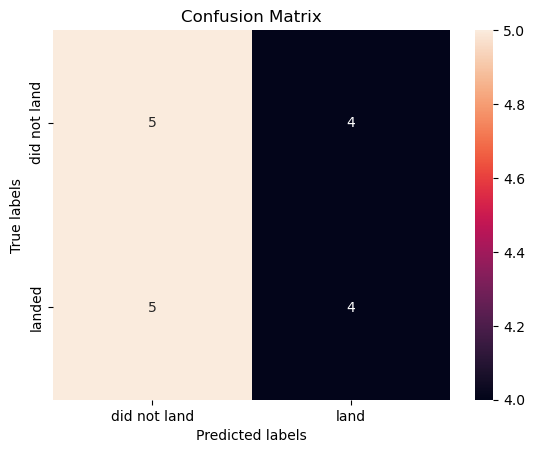

In [124]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [129]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [135]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np # Necessario per np.logspace

# --- Assunzioni: ---
# 1. X_train e Y_train sono già stati definiti dai COMPITI precedenti.
# 2. X_train è stato standardizzato.
# 3. Y_train contiene almeno due classi distinte.

# 1. Crea un oggetto macchina a vettori di supporto (SVM)
svm = SVC()

# 2. Definisci il dizionario dei parametri
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), # Rimosso 'rbf' duplicato
              'C': np.logspace(-3, 3, 5), # Genera 5 valori logaritmici tra 10^-3 e 10^3
              'gamma':np.logspace(-3, 3, 5)} # Genera 5 valori logaritmici tra 10^-3 e 10^3

# 3. Crea un oggetto GridSearchCV svm_cv con cv = 10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# 4. Adatta l'oggetto per trovare i parametri migliori dal dizionario parameters
print("\nCOMPITO 6: Avvio dell'addestramento GridSearchCV per SVM...")
try:
    svm_cv.fit(X_train, Y_train)
    print("COMPITO 6: Addestramento GridSearchCV per SVM completato.")

    # Visualizza i parametri migliori e l'accuratezza sui dati di convalida
    print("\nParametri ottimizzati (best parameters) per SVM: ", svm_cv.best_params_)
    print("Accuratezza sulla validazione (best score) per SVM: ", svm_cv.best_score_)

except Exception as e:
    print(f"COMPITO 6: Si è verificato un errore durante l'addestramento GridSearchCV per SVM: {e}")
    print("Assicurati che X_train e Y_train siano definiti correttamente e che Y_train contenga almeno 2 classi.")


COMPITO 6: Avvio dell'addestramento GridSearchCV per SVM...
COMPITO 6: Addestramento GridSearchCV per SVM completato.

Parametri ottimizzati (best parameters) per SVM:  {'C': 1.0, 'gamma': 1.0, 'kernel': 'sigmoid'}
Accuratezza sulla validazione (best score) per SVM:  0.594642857142857


In [136]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 1.0, 'kernel': 'sigmoid'}
accuracy : 0.594642857142857


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [139]:
# Assicurati che svm_cv sia stato addestrato nel COMPITO 6
# e che X_test e Y_test siano disponibili dai COMPITI precedenti.

# Calcola l'accuratezza sui dati di test utilizzando il metodo score per l'SVM
print("\n--- Inizio COMPITO 7 ---")
if 'svm_cv' in locals() and hasattr(svm_cv, 'best_estimator_'): # Controlla se svm_cv è stato fitted
    print("COMPITO 7: Calcolo dell'accuratezza sui dati di test per SVM...")
    accuracy_test_svm = svm_cv.score(X_test, Y_test)
    print(f"Accuratezza sui dati di test (SVM): {accuracy_test_svm}")
else:
    print("COMPITO 7: Impossibile calcolare l'accuratezza per SVM. svm_cv non è stato addestrato con successo.")


--- Inizio COMPITO 7 ---
COMPITO 7: Calcolo dell'accuratezza sui dati di test per SVM...
Accuratezza sui dati di test (SVM): 0.6111111111111112


We can plot the confusion matrix


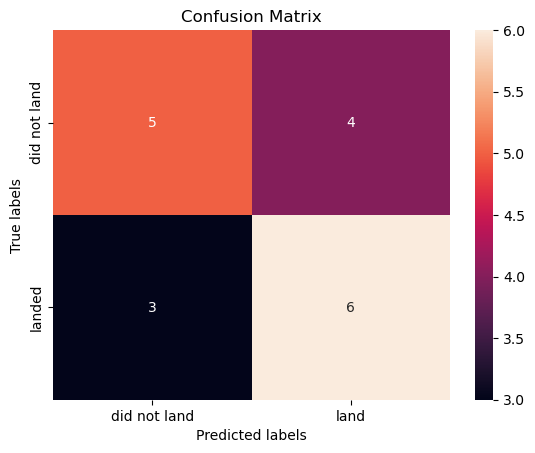

In [142]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# ... (le tue importazioni e i COMPITI 2 e 3 già eseguiti) ...

# 1. Crea un oggetto classificatore ad albero decisionale
tree = DecisionTreeClassifier()

# 2. Definisci il dizionario dei parametri
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['sqrt'], # DEVE ESSERE COSÌ
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# 3. Crea un oggetto GridSearchCV tree_cv con cv = 10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# --- AGGIUNGI QUESTO PER DEBUGGING ---
print(f"\nVerifica parametri per Decision Tree prima del fit: {parameters}")
# -----------------------------------

# 4. Adatta l'oggetto per trovare i parametri migliori dal dizionario parameters
print("\nCOMPITO 8: Avvio dell'addestramento GridSearchCV per Decision Tree...")
try:
    tree_cv.fit(X_train, Y_train)
    print("COMPITO 8: Addestramento GridSearchCV per Decision Tree completato.")

    print("\nParametri ottimizzati (best parameters) per Decision Tree: ", tree_cv.best_params_)
    print("Accuratezza sulla validazione (best score) per Decision Tree: ", tree_cv.best_score_)

except Exception as e:
    print(f"COMPITO 8: Si è verificato un errore durante l'addestramento GridSearchCV per Decision Tree: {e}")
    print("Assicurati che X_train e Y_train siano definiti correttamente e che Y_train contenga almeno 2 classi.")


Verifica parametri per Decision Tree prima del fit: {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

COMPITO 8: Avvio dell'addestramento GridSearchCV per Decision Tree...
COMPITO 8: Addestramento GridSearchCV per Decision Tree completato.

Parametri ottimizzati (best parameters) per Decision Tree:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuratezza sulla validazione (best score) per Decision Tree:  0.6375


In [150]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.6375


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [152]:
# Assicurati che tree_cv sia stato addestrato nel COMPITO 8
# e che X_test e Y_test siano disponibili dai COMPITI precedenti.

# Calcola l'accuratezza sui dati di test utilizzando il metodo score per il Decision Tree
print("\n--- Inizio COMPITO 9 ---")
if 'tree_cv' in locals() and hasattr(tree_cv, 'best_estimator_'): # Controlla se tree_cv è stato fitted
    print("COMPITO 9: Calcolo dell'accuratezza sui dati di test per Decision Tree...")
    accuracy_test_tree = tree_cv.score(X_test, Y_test)
    print(f"Accuratezza sui dati di test (Decision Tree): {accuracy_test_tree}")
else:
    print("COMPITO 9: Impossibile calcolare l'accuratezza per Decision Tree. tree_cv non è stato addestrato con successo.")


--- Inizio COMPITO 9 ---
COMPITO 9: Calcolo dell'accuratezza sui dati di test per Decision Tree...
Accuratezza sui dati di test (Decision Tree): 0.3888888888888889


We can plot the confusion matrix


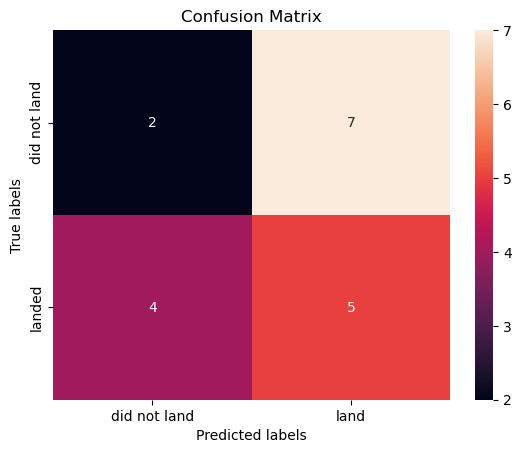

In [155]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np # Non strettamente necessario per questo, ma utile in generale

# --- Assunzioni: ---
# 1. X_train e Y_train sono già stati definiti dai COMPITI precedenti.
# 2. X_train è stato standardizzato.
# 3. Y_train contiene almeno due classi distinte.

# 1. Crea un oggetto k nearest neighbors
KNN = KNeighborsClassifier()

# 2. Definisci il dizionario dei parametri
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]} # p=1 per distanza Manhattan, p=2 per distanza Euclidea

# 3. Crea un oggetto GridSearchCV knn_cv con cv = 10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# 4. Adatta l'oggetto per trovare i parametri migliori dal dizionario parameters
print("\nCOMPITO 10: Avvio dell'addestramento GridSearchCV per KNN...")
try:
    knn_cv.fit(X_train, Y_train)
    print("COMPITO 10: Addestramento GridSearchCV per KNN completato.")

    # Visualizza i parametri migliori e l'accuratezza sui dati di convalida
    print("\nParametri ottimizzati (best parameters) per KNN: ", knn_cv.best_params_)
    print("Accuratezza sulla validazione (best score) per KNN: ", knn_cv.best_score_)

except Exception as e:
    print(f"COMPITO 10: Si è verificato un errore durante l'addestramento GridSearchCV per KNN: {e}")
    print("Assicurati che X_train e Y_train siano definiti correttamente e che Y_train contenga almeno 2 classi.")


COMPITO 10: Avvio dell'addestramento GridSearchCV per KNN...
COMPITO 10: Addestramento GridSearchCV per KNN completato.

Parametri ottimizzati (best parameters) per KNN:  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
Accuratezza sulla validazione (best score) per KNN:  0.5428571428571429


In [159]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.5428571428571429


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [161]:
# Assicurati che knn_cv sia stato addestrato nel COMPITO 10
# e che X_test e Y_test siano disponibili dai COMPITI precedenti.

# Calcola l'accuratezza sui dati di test utilizzando il metodo score per KNN
print("\n--- Inizio COMPITO 11 ---")
if 'knn_cv' in locals() and hasattr(knn_cv, 'best_estimator_'): # Controlla se knn_cv è stato fitted
    print("COMPITO 11: Calcolo dell'accuratezza sui dati di test per KNN...")
    accuracy_test_knn = knn_cv.score(X_test, Y_test)
    print(f"Accuratezza sui dati di test (KNN): {accuracy_test_knn}")
else:
    print("COMPITO 11: Impossibile calcolare l'accuratezza per KNN. knn_cv non è stato addestrato con successo.")


--- Inizio COMPITO 11 ---
COMPITO 11: Calcolo dell'accuratezza sui dati di test per KNN...
Accuratezza sui dati di test (KNN): 0.6111111111111112


We can plot the confusion matrix


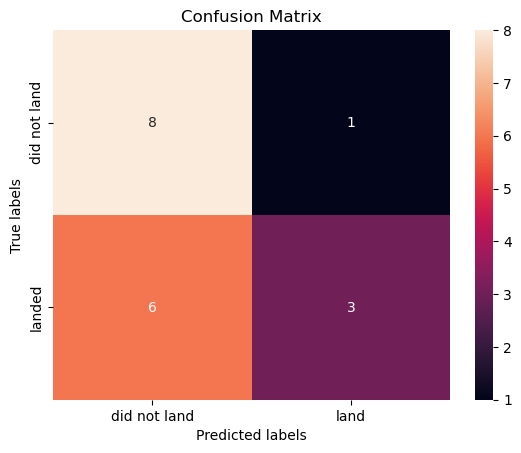

In [164]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [166]:
# --- Inizio COMPITO 12 ---
print("\n--- Inizio COMPITO 12 ---")
print("Confronto delle accuratezze sui dati di test:")

# Creiamo un dizionario per raccogliere i risultati
test_accuracies = {}

# Verifichiamo e aggiungiamo i risultati solo se le variabili sono definite
if 'accuracy_test' in locals():
    test_accuracies['Regressione Logistica'] = accuracy_test
    print(f"Accuratezza Regressione Logistica: {accuracy_test:.4f}")
else:
    print("Accuratezza Regressione Logistica non disponibile (COMPITO 5 non eseguito correttamente).")

if 'accuracy_test_svm' in locals():
    test_accuracies['SVM'] = accuracy_test_svm
    print(f"Accuratezza SVM: {accuracy_test_svm:.4f}")
else:
    print("Accuratezza SVM non disponibile (COMPITO 7 non eseguito correttamente).")

if 'accuracy_test_tree' in locals():
    test_accuracies['Albero Decisionale'] = accuracy_test_tree
    print(f"Accuratezza Albero Decisionale: {accuracy_test_tree:.4f}")
else:
    print("Accuratezza Albero Decisionale non disponibile (COMPITO 9 non eseguito correttamente).")

if 'accuracy_test_knn' in locals():
    test_accuracies['K-Nearest Neighbors'] = accuracy_test_knn
    print(f"Accuratezza K-Nearest Neighbors: {accuracy_test_knn:.4f}")
else:
    print("Accuratezza K-Nearest Neighbors non disponibile (COMPITO 11 non eseguito correttamente).")

# Troviamo il modello con la migliore accuratezza
if test_accuracies: # Assicurati che il dizionario non sia vuoto
    best_model_name = max(test_accuracies, key=test_accuracies.get)
    best_accuracy = test_accuracies[best_model_name]
    print(f"\nIl metodo che funziona meglio sui dati di test è: {best_model_name} con un'accuratezza di {best_accuracy:.4f}")
else:
    print("\nNessun risultato di accuratezza disponibile per il confronto.")


--- Inizio COMPITO 12 ---
Confronto delle accuratezze sui dati di test:
Accuratezza Regressione Logistica: 0.5000
Accuratezza SVM: 0.6111
Accuratezza Albero Decisionale: 0.3889
Accuratezza K-Nearest Neighbors: 0.6111

Il metodo che funziona meglio sui dati di test è: SVM con un'accuratezza di 0.6111


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
